# Project instructions

1.      Parse all text from the downloaded HTML files.
2.      Explore the parsed output to learn how job skills are described in online postings. We’ll pay particular attention to whether certain HTML tags are more associated with skill descriptions.
3.      Attempt to filter any irrelevant job postings from the dataset.
4.      Cluster job skills based on text similarity.
5.      Visualize the clusters using word clouds.
6.      Adjust clustering parameters, if necessary, to improve the visualized output.
7.      Compare the clustered skills to our resume(*) to uncover missing skills.

# Resume we'd like to compare postings to

Experience

1. Developed probability simulations using NumPy.
2. Assessed online ad-clicks for statistical significance using Permutation testing.
3. Analyzed disease outbreaks using common clustering algorithms.

Additional Skills

1. Data visualization using Matplotlib.
2. Statistical analysis using SciPy.
3. Processing structured tables using Pandas.
4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.
5. Extracting locations from text using GeonamesCache.
6. Location analysis and visualization using GeonamesCache and Basemap.
7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.
8. NLP analysis and text topic detection using Scikit-Learn.

In [117]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

# Import and parse the .html files
Keep the body both with and without the html tags

In [118]:
data = []
folder = r"C:\Users\balin\Desktop\magnimind-assignments\NLP job_posting project\data\job_postings"

for filename in os.listdir(folder):
    if filename.endswith('.html'):
        full_path = os.path.join(folder, filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'lxml')
            title = soup.title.text if soup.title else 'No Title'
           
            body_text = soup.body.get_text(separator='\n', strip=True) if soup.body else ''
            body_html = soup.body.prettify() if soup.body else ''
            
            data.append({'filename': filename, 'title': title, 'body_text': body_text, 'body_html': body_html})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)


# Some basic dataset exploration

In [119]:
# Check for any nulls in the title
df[df['title'] == 'No Title']

,filename,title,body_text,body_html


In [120]:
print(df.columns)

Index(['filename', 'title', 'body_text', 'body_html'], dtype='object')


In [121]:
df.shape

(1458, 4)

In [122]:
df.head(10)

,filename,title,body_text,body_html
0,001b92395ed0fb62.html,"Data Scientist - Beavercreek, OH","Data Scientist - Beavercreek, OH\nData Scienti...","<body>\n <h2>\n Data Scientist - Beavercreek,..."
1,00321a48d04fe754.html,"Data Scientist - Seattle, WA 98101","Data Scientist - Seattle, WA 98101\nAre you in...","<body>\n <h2>\n Data Scientist - Seattle, WA ..."
2,0079c11b2611349f.html,"Data Scientist - Newark, CA","Data Scientist - Newark, CA\nData Scientist\nN...","<body>\n <h2>\n Data Scientist - Newark, CA\n..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,Patient Care Assistant / PCA - Med/Surg (Fayet...,<body>\n <h2>\n Patient Care Assistant / PCA ...
4,00bf37ae19c7dfd7.html,"Data Manager / Analyst - Oakland, CA","Data Manager / Analyst - Oakland, CA\nHOW YOU ...",<body>\n <h2>\n Data Manager / Analyst - Oakl...
5,0125eabc844281c9.html,"Scientific Programmer - Berkeley, CA","Scientific Programmer - Berkeley, CA\nCaribou ...",<body>\n <h2>\n Scientific Programmer - Berke...
6,014ae4dbded805d2.html,JD Digits - AI Lab Research Intern - Mountain ...,JD Digits - AI Lab Research Intern - Mountain ...,<body>\n <h2>\n JD Digits - AI Lab Research I...
7,014ea972a4aa9812.html,Operations and Technology Summer 2020 Internsh...,Operations and Technology Summer 2020 Internsh...,<body>\n <h2>\n Operations and Technology Sum...
8,0179ea131f141400.html,PwC Labs - Jr. Data Scientist - Machine Learni...,PwC Labs - Jr. Data Scientist - Machine Learni...,<body>\n <h2>\n PwC Labs - Jr. Data Scientist...
9,018866568cd5a0b0.html,"Data and Reporting Analyst - Olympia, WA 98501","Data and Reporting Analyst - Olympia, WA 98501...",<body>\n <h2>\n Data and Reporting Analyst - ...


In [123]:
df.describe()


,filename,title,body_text,body_html
count,1458,1458,1458,1458
unique,1458,1364,1457,1457
top,_p.html,"Data Scientist - New York, NY","Physics Data Scientist - Foothill Ranch, CA\nT...",<body>\n <h2>\n Physics Data Scientist - Foot...
freq,1,13,2,2


In [124]:
# get simple statistics about length of body_text
df['body_text_length'] = df['body_text'].apply(len)
df['body_text_length'].describe()


count     1458.000000
mean      4222.222222
std       2052.157912
min         30.000000
25%       2904.250000
50%       3878.000000
75%       5042.000000
max      19040.000000
Name: body_text_length, dtype: float64

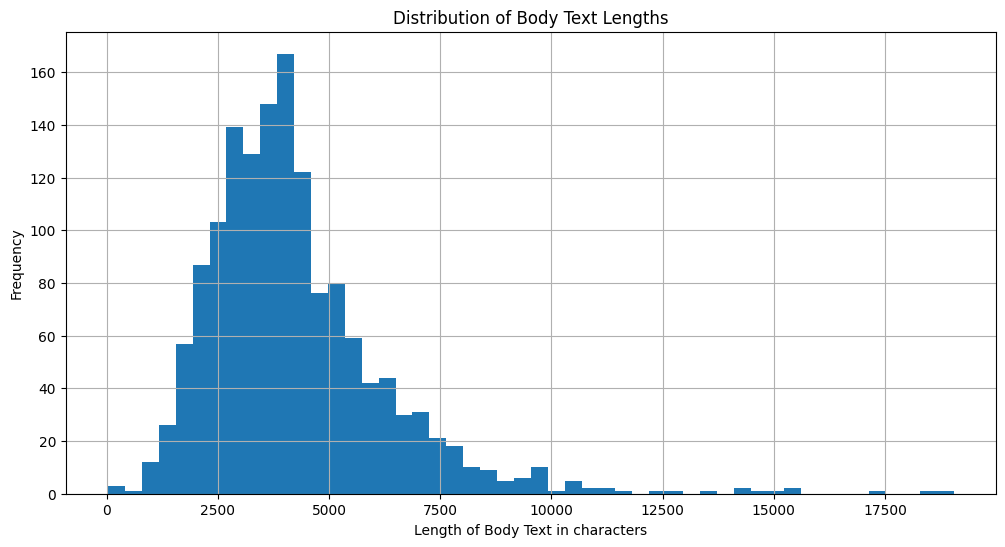

In [125]:
df['body_text_length'].hist(bins=50, figsize=(12, 6))
plt.title('Distribution of Body Text Lengths')
plt.xlabel('Length of Body Text in characters')
plt.ylabel('Frequency')
plt.show()

Some right-skew in the data, peak ~4000 characters inc. spaces, most fall between 2,000 and 7000 chars. some outliers w/very long descriptions

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          1458 non-null   object
 1   title             1458 non-null   object
 2   body_text         1458 non-null   object
 3   body_html         1458 non-null   object
 4   body_text_length  1458 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 57.1+ KB


In [127]:
# Any duplicates based on the 'body_text' column
df[df['body_text'].duplicated(keep=False)].shape[0]

2

In [128]:
df = df.drop_duplicates(subset=['body_text'], keep='first')

In [129]:
df.shape

(1457, 5)

# Clean the data

In [130]:
df['body_text'][df['filename'] == '0179ea131f141400.html'].values[0][:1000]

'PwC Labs - Jr. Data Scientist - Machine Learning (NLP) - Tampa, FL 33607\nPwC Labs is focused on standardizing, automating, delivering tools and processes and exploring emerging technologies that drive efficiency and enable our people to reimagine the possible. Process improvement, transformation, effective use of innovative technology and data & analytics, and leveraging alternative delivery solutions are key areas of focus to drive additional value for our firm. The AI Lab focuses on implementing solutions that impact efficiency and effectiveness of our technology functions. Process improvement, transformation, effective use of technology and data & analytics, and leveraging alternative delivery are key areas to drive value and continue to be recognized as the leading professional services firm. AI Lab is focused on identifying and prioritizing emerging technologies to get the most out of our investments.\nTo really stand out and make us ?t for the future in a constantly changing wo

In [131]:
# Split the title roughly into job title and location on the last separator 
split = df['title'].str.rsplit(' - ', n=1, expand=True)
df['job_title'] = split[0]
df['location']  = split[1].fillna('Unknown') # for no location

In [132]:
df.drop(columns=['title','filename'], inplace=True)

In [133]:
df.sample(10)

,body_text,body_html,body_text_length,job_title,location
1074,Natural Language Processing Engineer - Pasaden...,<body>\n <h2>\n Natural Language Processing E...,1911,Natural Language Processing Engineer,"Pasadena, CA"
876,"Senior Data Scientist - Alexandria, VA\nSecure...",<body>\n <h2>\n Senior Data Scientist - Alexa...,6886,Senior Data Scientist,"Alexandria, VA"
1391,"Applied Science Intern, Speech & Language Tech...","<body>\n <h2>\n Applied Science Intern, Speec...",3018,"Applied Science Intern, Speech & Language Tech...","Seattle, WA"
83,Data Scientist – Statistics and Machine Learni...,<body>\n <h2>\n Data Scientist – Statistics a...,3030,Data Scientist – Statistics and Machine Learni...,"Indianapolis, IN 46268"
1411,Staff Nurse II - Telemetry-NOC-Benefitted - Va...,<body>\n <h2>\n Staff Nurse II - Telemetry-NO...,3529,Staff Nurse II - Telemetry-NOC-Benefitted,"Vallejo, CA"
26,"Quantitative Business Analyst, Geo - Mountain ...",<body>\n <h2>\n Quantitative Business Analyst...,3151,"Quantitative Business Analyst, Geo","Mountain View, CA"
779,"Data Scientist - Portsmouth, NH\nToday Lonza i...","<body>\n <h2>\n Data Scientist - Portsmouth, ...",3414,Data Scientist,"Portsmouth, NH"
613,"Data Analyst - San Francisco, CA\n2+ years of ...","<body>\n <h2>\n Data Analyst - San Francisco,...",3031,Data Analyst,"San Francisco, CA"
443,"Director, Data Science - Austin, TX 78716\nThe...","<body>\n <h2>\n Director, Data Science - Aust...",6490,"Director, Data Science","Austin, TX 78716"
833,"Internship - Data Scientist, Denver CO (Summer...","<body>\n <h2>\n Internship - Data Scientist, ...",2916,"Internship - Data Scientist, Denver CO (Summer...","Denver, CO 80221"


In [134]:
def strip_header(row):
    """Remove job title and location header from job description body"""
    body_text, job_title, location = row['body_text'], row['job_title'], row['location']
    header = f"{job_title} - {location}"
    
    # If body starts with the exact header, remove it cleanly
    if body_text.startswith(header):
        return body_text[len(header):].lstrip('\n')
    
    # Otherwise keep the original text
    return body_text

df['body_text'] = df.apply(strip_header, axis=1)


In [135]:
df.sample(10)

,body_text,body_html,body_text_length,job_title,location
1209,"Our Pleasanton, CA based client has an immedia...",<body>\n <h2>\n Product Manager - Experimenta...,3526,Product Manager - Experimentation/ Adobe Target,"Pleasanton, CA"
715,If you’re looking to move your engineering car...,<body>\n <h2>\n Plant Engineering Specialist ...,3607,Plant Engineering Specialist,"San Pablo, CA"
1369,About Peritus\nPeritus enables self-healing au...,"<body>\n <h2>\n Data Scientist - Palo Alto, C...",3660,Data Scientist,"Palo Alto, CA"
1297,Job Description:\nPOSITION DESCRIPTION\n\nPosi...,"<body>\n <h2>\n Audit Manager - Dallas, TX 75...",8990,Audit Manager,"Dallas, TX 75228"
755,Job Description :\nAre you the kind of person ...,"<body>\n <h2>\n Data Scientist - Trumbull, CT...",4450,Data Scientist,"Trumbull, CT 06611"
231,Natural Language Processing and Machine Learni...,<body>\n <h2>\n Natural Language Processing a...,3532,Natural Language Processing and Machine Learni...,"South San Francisco, CA 94080"
425,"As a leading mobile games developer, Jam City ...","<body>\n <h2>\n Data Analyst - Culver City, C...",4037,Data Analyst,"Culver City, CA"
685,The candidate shall perform duties for Configu...,<body>\n <h2>\n Jo. Equipment Specialist - Ok...,4179,Jo. Equipment Specialist,"Oklahoma City, OK 73135"
535,"Like Stats?\nYeah, us too!\nCheck these:\n600+...",<body>\n <h2>\n Principal Data Scientist - An...,4804,Principal Data Scientist,"Ann Arbor, MI 48104"
812,"Req ID:\n48377\nAt NTT DATA Services, we know ...",<body>\n <h2>\n Intelligence Analyst - Merrif...,4556,Intelligence Analyst,"Merrifield, VA"


In [136]:
df['body_html'].iloc[3][:1000]

'<body>\n <h2>\n  Patient Care Assistant / PCA - Med/Surg (Fayette, AL) - Fayette, AL\n </h2>\n <h1 class="jobSectionHeader">\n  <b>\n   Performance Planning\n  </b>\n </h1>\n <p>\n  Provides personal care and support services under the supervision of a registered nurse that assists the patient in the achievement of physical and emotional comfort.\n </p>\n <h1 class="jobSectionHeader">\n  <b>\n   Key Responsibilities/Essential Functions\n  </b>\n </h1>\n <ul>\n  <li>\n   Provides all personal care services in accordance with the plan of treatment assigned by the registered nurse\n  </li>\n  <li>\n   Accurately documents care provided\n  </li>\n  <li>\n   Applies safety principles and proper body mechanics to the performance of specific techniques of personal and supportive care, such as ambulation of patients, transferring patients, assisting with normal range of motions and positioning\n  </li>\n  <li>\n   Participates in economical utilization of supplies and ensures that equipment a

## Job title analysis

Have a look at most common words in job titles

In [137]:
# Extract common terms from job titles
from collections import Counter
import re

# Tokenize job titles
def tokenize(text):
    return re.sub(r'[^\w\s]', ' ', text.lower()).split()

# Flatten all tokenized words from job titles
all_words = [word for title in df['job_title'] for word in tokenize(title)]

word_counts = Counter(all_words)

# Display top 20 word counts
print("Most common words in job titles:")
print(word_counts.most_common(10))

Most common words in job titles:
[('data', 749), ('scientist', 447), ('analyst', 189), ('engineer', 188), ('and', 174), ('science', 128), ('senior', 123), ('intern', 102), ('analytics', 83), ('manager', 82)]


In [138]:
df['job_title'].value_counts()

job_title
Data Scientist                      157
Senior Data Scientist                33
Data Analyst                         20
Data Engineer                        15
Machine Learning Engineer            12
                                   ... 
Senior Statistician                   1
Cyber Intelligence Analyst            1
Data & Tableau Reporting Analyst      1
Python Systems Engineer               1
Data Scientist - Oil and Gas          1
Name: count, Length: 1119, dtype: int64

Lots of different job titles with many similar roles having slightly different names. Will start by grouping these together ins ome way 

In [139]:
# Function to classifty job titles into categories
def classify_job_title(title):
    title = title.lower()
    categories = []
    if any(keyword in title for keyword in ['analyst', 'analytics']):
        categories.append('Data Analysis')
    if any(keyword in title for keyword  in ['scientist', 'science']):
        categories.append('Data Science')
    if any (keyword in title for keyword in ['engineer','engineering']):
        categories.append('Data Engineering')
    if any(keyword in title for keyword in ['machine learning', 'ml']):
        categories.append('Machine Learning')
    if any(keyword in title for keyword in ['developer', 'programmer', 'programming', 'dev', 'software']):
        categories.append('Software Development')
    if any(keyword in title for keyword in ['researcher','research']):
        categories.append('Research')
    if any(keyword in title for keyword in ['manager', 'management']):
        categories.append('Management')
    if any(keyword in title for keyword in ['consultant', 'consulting']):
        categories.append('Consulting')
    if any(keyword in title for keyword in ['nurse', 'nursing']):
        categories.append('Nursing')
    
    if not categories:
       categories.append('Other')
    
    return categories

# Apply the function to the job_title column
df['job_categories'] = df['job_title'].apply(classify_job_title)
# Get all unique categories
all_categories = set()
for categories in df['job_categories']:
    all_categories.update(categories)

# Create binary columns for each category
for category in all_categories:
    df[f'is_{category.replace(" ", "_")}'] = df['job_categories'].apply(lambda x: category in x)


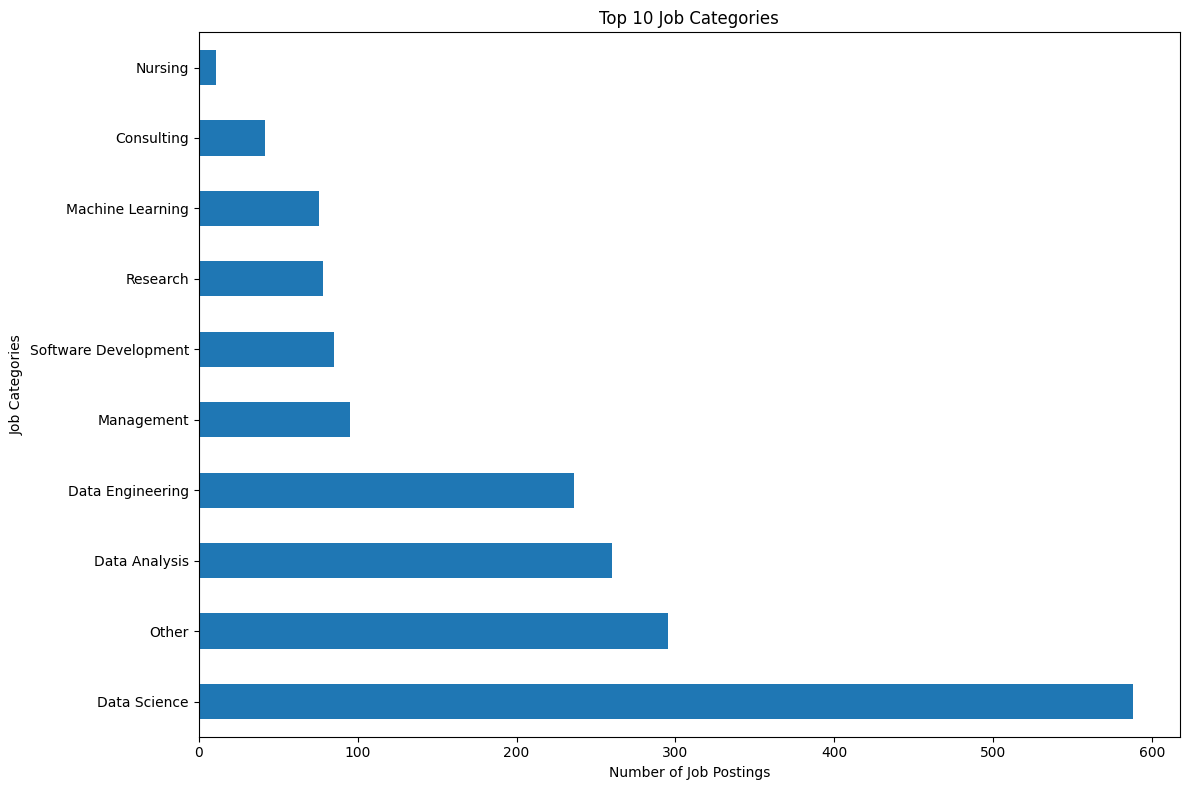

In [140]:
category_counts = df.explode('job_categories')['job_categories'].value_counts().head(10)

# Plot the top 10
category_counts.plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 Job Categories')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Categories')
plt.tight_layout()
plt.show()

Have a look at 'other' category to see whether other groups jump out

In [141]:
others_jobs = df[df['is_Other'] == True]
others_jobs['job_title'].value_counts().sample(10)

job_title
Phone and Credential Representative, PCS                                      1
Summer Intern - Logistics and Infrastructure                                  1
NETP Trainer                                                                  1
Postdoctoral Position – Cheminformatics Team                                  1
View & Apply                                                                  1
Part Time Store Associate                                                     1
Associate/Full Professor                                                      1
Computational Biologist                                                       1
Program and Data Assistant, Biology Scholars Program (4722C) - 1597 - 1597    1
Business Planning and Operations Associate - SBG                              1
Name: count, dtype: int64

Have a look at the distribution of seniorty of roles

In [142]:
def extract_seniority(title):
    title = title.lower()
    
    if any(level in title for level in ['senior', 'sr', 'sr.', 'principal']):
        return 'Senior'
    elif any(level in title for level in ['junior', 'jr', 'jr.', 'associate','intern', 'entry-level','assistant']):
        return 'Junior'
    elif any(level in title for level in ['lead', 'head', 'chief', 'director', 'manager', 'president', 'vp']):
        return 'Leadership'
    else:
        return 'Mid-level'

df['seniority'] = df['job_title'].apply(extract_seniority)
seniority_counts = df['seniority'].value_counts()
print(seniority_counts)

seniority
Mid-level     898
Junior        236
Senior        183
Leadership    140
Name: count, dtype: int64


In [143]:
df[df['seniority'] == 'Mid-level']['job_title'].value_counts().sample(10)

job_title
Software Developer 3                              1
HR/Controller Dual                                1
Technical Trainer                                 1
IED and Insurgent Network Analyst - Journeyman    1
Data Scientist for Materials Science              1
Linguist/Language Analyst                         1
Stock / Forex Trader                              1
Mid-Level Software Engineer_IDM                   1
NETP Trainer                                      1
Data Scientist, Analytics - Video Integrity       1
Name: count, dtype: int64

Further work: could also look at location data for the different job postings to find hotspots/any associations between different roles and locations

# 1: Look at html tags and associations with skills

Count the total number of all tags across the corpus

In [144]:
# identify the tags and their counts in the HTML body corpus
tag_counter = Counter()

for html in df['body_html']:
    soup = BeautifulSoup(html, 'lxml')
    tags = [tag.name for tag in soup.find_all()]
    tag_counter.update(tags)

tag_counter.most_common(10)

[('li', 25186),
 ('div', 14149),
 ('p', 11620),
 ('br', 10756),
 ('b', 7789),
 ('ul', 5074),
 ('h2', 2066),
 ('html', 1457),
 ('body', 1457),
 ('i', 593)]

In [145]:
# Identify skill related texty
skill_keywords = ['proficient', 'proficiency', 'experience',  'knowledge', 'python', 'java', 'sql', 'r', 'c++', 'javascript', 'html', 'css', 'machine learning', 
                  'deep learning', 'data analysis', 'data visualization', 'big data', 'cloud computing', 'aws', 'azure', 'docker', 'kubernetes', 'git']


# filter out high level tags 
target_tags = {'li', 'p', 'span', 'b', 'strong', 'h2', 'h3', 'h4','h5'}
# create counters for overall tag use and one for skill related tags
skill_tag_counter = Counter()
overall_tag_counter = Counter()

for html in df['body_html']:
    soup = BeautifulSoup(html, 'lxml')
    
    for tag in soup.find_all():
        tag_name = tag.name

        if tag_name not in target_tags:
            continue
        # Count the tag only if it is not in the skip list
        tag_text = tag.get_text(strip=True).lower()

        # Always count this tag in the total
        overall_tag_counter[tag_name] += 1

        # Only count it as a "skill-tag" if it contains a keyword
        if any(kw in tag_text for kw in skill_keywords):
            skill_tag_counter[tag_name] += 1


In [146]:
# Combine the two counters into a DataFrame for easier analysis
tag_df = pd.DataFrame([{'tag': tag, 'overall_count': overall_tag_counter[tag], 'skill_count': skill_tag_counter[tag], 'percentage': (skill_tag_counter[tag]/overall_tag_counter[tag]) * 100 if overall_tag_counter[tag] > 0 else 0}
                       for tag in overall_tag_counter
                       ])

tag_df.sort_values(by = 'percentage', ascending = False).head(10)

,tag,overall_count,skill_count,percentage
3,li,25186,24425,96.978480
5,h5,56,50,89.285714
0,h2,2066,1688,81.703775
6,h4,60,43,71.666667
1,p,11620,7785,66.996558
2,b,7789,5118,65.708050
4,h3,344,224,65.116279


Looks like skills are often embedded in `<li>` inside `<ul>`, which makes sense? I could also track and compare usage between technical vs. soft skill keywords inside these tags.


In [147]:
# Have a look at a few <li> tags as sanity check
import random
from itertools import chain

def extract_li_tags(html):
    soup = BeautifulSoup(html, 'lxml')
    return [li.get_text(strip=True) for li in soup.find_all('li')]

df['li_skills'] = df['body_html'].apply(extract_li_tags)

all_li_phrases = list(chain.from_iterable(df['li_skills']))
sampled_li = random.sample(all_li_phrases, 10)
print("Sampled <li> tags:")
for li in sampled_li:
    print(f"- {li}")

Sampled <li> tags:
- Develop real-time fraud and collection prevention models, and strategies to minimize fraud and improve recovery rate
- Share your technical solutions and product ideas with the team through design review, pair programming, code/model reviews, and tech talks
- Current information security and compliance vendor landscape
- Install and remove board level assemblies and perform basic installation and check out functions and execute regression and acceptance procedures.
- Contribute to research and product development efforts in the statistics group
- Use exceptional communication skills and with input from product management, development, and architecture thought leaders, work to deliver high quality end-to-end Solutions at Scale in response to the identified business requirements from our clients; ensure the results are statistically valid
- Current Bachelor's, Master's or PHD candidate, with advanced degree students preferred
- Engaging with stakeholders from varied 

# 2: Filter out irrelevant job postings

Looking at the resume skills, it looks like relevant jobs for the person are in the field of data science and machine learning, potentially also data engineering and research. From my EDA of job titles, I can filter out job titles that do not fall into these categories

In [148]:
df_filtered = df[(df['is_Data_Analysis'] == True) | (df['is_Data_Science'] == True) | (df['is_Data_Engineering'] == True) | (df['is_Machine_Learning'] == True)  | (df['is_Research'] == True)]
df_filtered.shape

(1055, 18)

Filtering has reduced dataset size by about a third

I could also filter by seniority (likely this person is interested in mid-level roles, could filter out the juniour and leadership roles for example)

# Cluster job skills based on text similarity.

In [149]:
#Preprocess li phrases
def clean_skill(skill):
    skill = skill.lower()
    skill = re.sub(r'[^a-z0-9\s]', '', skill)  # remove punctuation
    return skill.strip()

cleaned_skills = list(set([clean_skill(skill) for skill in all_li_phrases if len(skill.strip()) > 2]))
cleaned_skills[:10]


['',
 'comprehensive health and dental insurance for employees and their families',
 'machine learning frameworks and tools eg pandas numpy scikitlearn mlr caret h2o tensorflow mxnet pytorch caffecaffe2 cntk and mllib',
 'algorithm development experience',
 'experience in a skilled production manufacturing or assembly nontechnical field',
 'apply critical perspective across multiple clients and industry data sources pharmetrics truven marketscan xponent etc',
 'cover letter',
 'hyperparameter tuning containerization and deployment at all scales',
 'writing skills to document procedures',
 'basic typing skills']

In [150]:
# Vectorise with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_skills)

use the elbow method to determine appropriate number of clusters

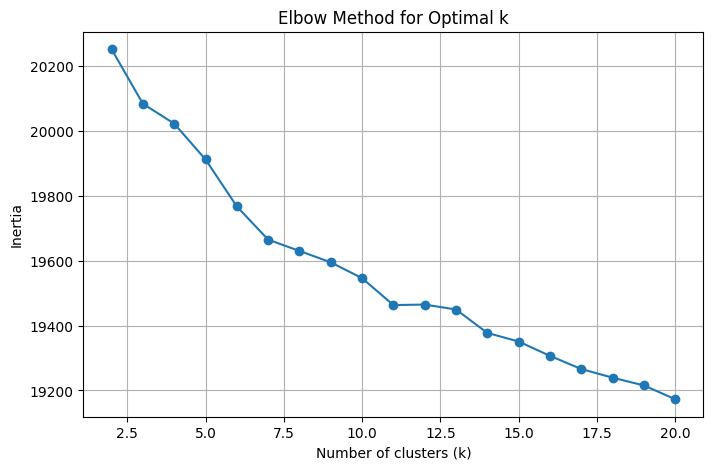

In [151]:
from sklearn.cluster import KMeans
# Try a range of cluster counts
inertia = []
K_range = range(2, 21)  # Try from 2 to 20 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)  # Inertia = sum of squared distances to nearest centroid

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [152]:
# Cluster with KMeans
from sklearn.cluster import KMeans

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # n_clusters as determined from elbow method
kmeans.fit(X)

labels = kmeans.labels_

K-means: fast, easy to apply, works well when clusters are compact, spherical and similar in size

In [153]:
# generarte dataframe with skills and their cluster labels
clustered = pd.DataFrame({
    'skill': cleaned_skills,
    'cluster': labels
})

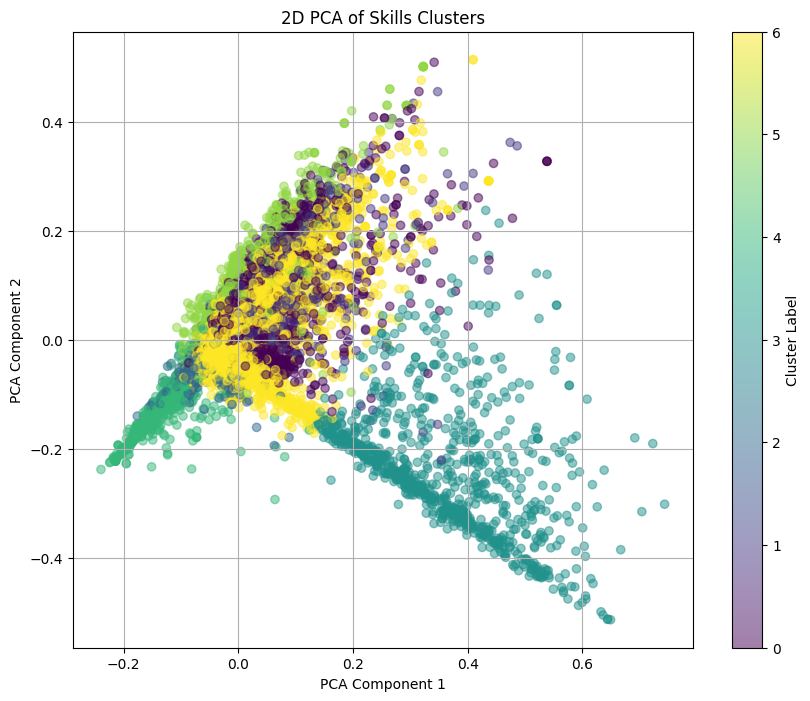

In [ ]:
# Visualise the clustered skills as 2d points
from sklearn.decomposition import PCA
# reduce high dimensional TF-IDF vectors for plotting
pca = PCA(n_components = 2, random_state = 42)
X_2d = pca.fit_transform(X.toarray()) # converts from sparse to dense matrix for PCA

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, alpha=0.5)
plt.title('2D PCA of Skills Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()



Some clusters show good separartion, others quite irregular and overlapping
-> Could try DBScan/HDBSCAN: Works well for arbitrary-shaped clusters of different sizes, doesn't handle high-dimensional data so well like TF-IDF but can use PCA for dimensionality reduction first

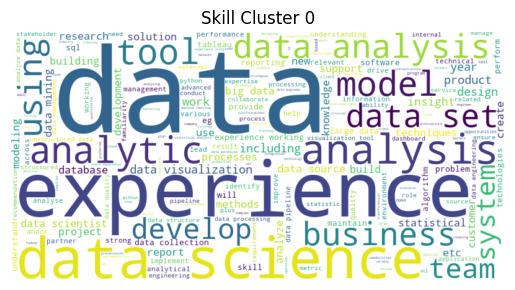

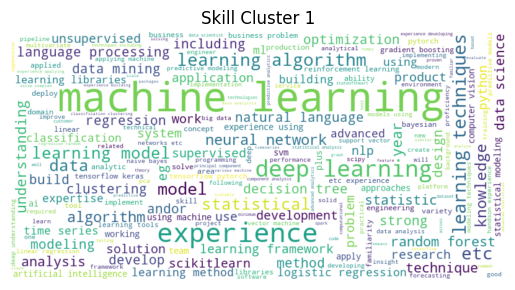

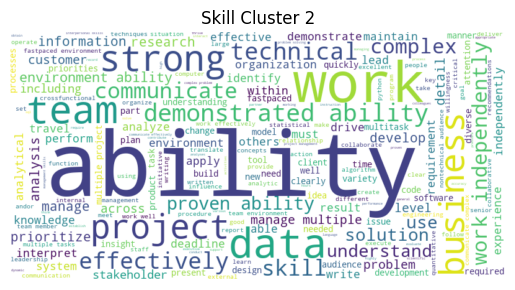

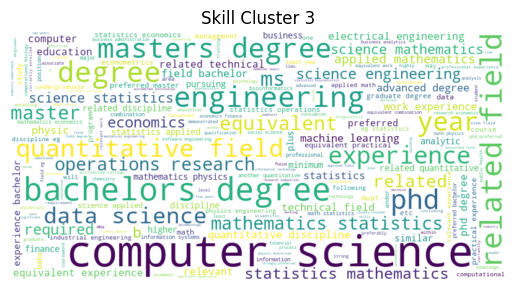

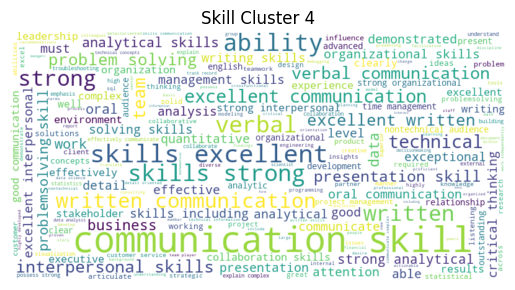

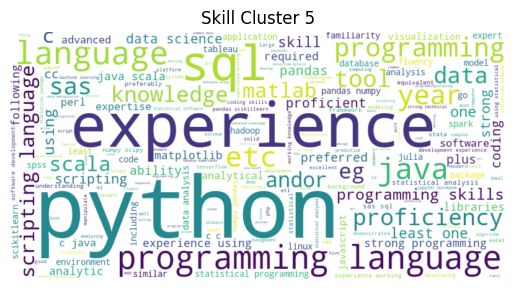

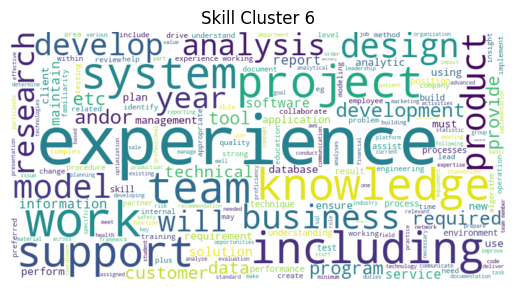

In [154]:
#visualise with wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(n_clusters):
    text = ' '.join(clustered[clustered['cluster'] == i]['skill'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Skill Cluster {i}")
    plt.show()

# Compare these results to candidate resume to see missing skills in resume:

In [155]:
# map the resume onto TF-IDF space
with open(r"C:\Users\balin\Desktop\magnimind-assignments\NLP job_posting project\data\resume.txt", "r", encoding="utf-8") as f:
    resume = f.read()

# Clean the resume text
resume_clean = resume.lower()
resume_vec = vectorizer.transform([resume_clean])

In [159]:
# Compute similarity with each cluster centroid
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(resume_vec, kmeans.cluster_centers_)
similarities_df = pd.DataFrame(similarities, columns=[f"Cluster {i}" for i in range(n_clusters)])
similarities_df = similarities_df.T  # Transpose for easier viewing


In [160]:
similarities_df.columns = ['Similarity']
similarities_df = similarities_df.sort_values('Similarity', ascending=False)

# Annotate the clusters
cluster_labels = {
    0: "Data & Analytics",
    1: "Machine learning",
    2: "Teamwork & Collaboration",
    3: "Qualifictations",
    4: "Communication Skills",
    5: "Programming languages/skills",
    6: "Business appitude"
}

similarities_df.index = similarities_df.index.map(lambda x: cluster_labels[int(x.split()[-1])])
display(similarities_df)

,Similarity
Data & Analytics,0.152532
Business appitude,0.133588
Machine learning,0.111475
Programming languages/skills,0.107311
Communication Skills,0.046766
Teamwork & Collaboration,0.030589
Qualifictations,0.009313


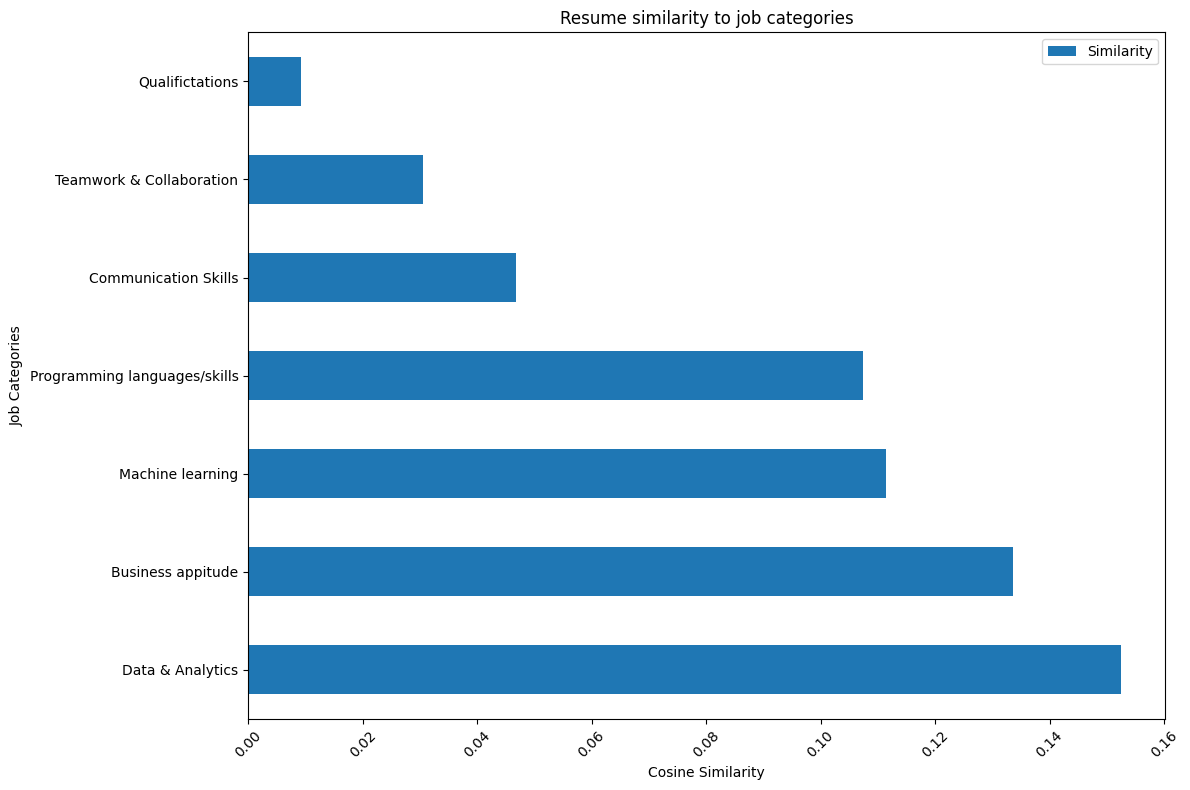

In [162]:
similarities_df.plot(kind='barh', figsize=(12, 8))
plt.title('Resume similarity to job categories')
plt.xlabel('Cosine Similarity')
plt.xticks(rotation=45) 
plt.ylabel('Job Categories')
plt.tight_layout()
plt.show()

Conclusions: 
- Resume weakest on 'Qualifications', and also soft skills like 'Teamwork and Collaboration' and 'Communication Skills' 
- Resume stronger on technical skills ('Data & Analytics', 'Machine Learning')